-0.012103465022565681 0.001961912901999161


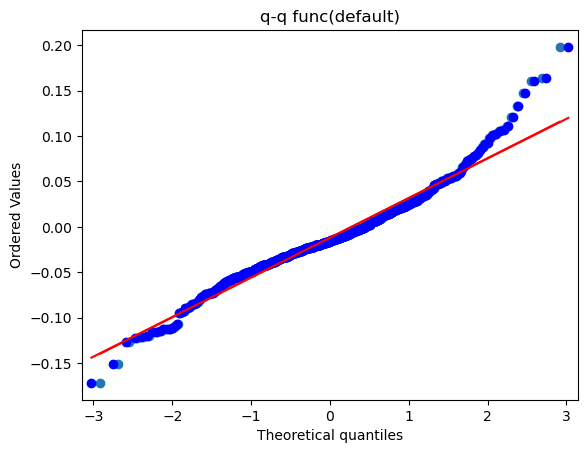

In [3]:
import pandas
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

current_path = os.path.abspath('')
df = pandas.read_excel(current_path + '/../data/data.xlsx')
df['上市公告日期'] = pandas.to_datetime(df['上市公告日期'],format="%Y-%m-%d")
# 2019年至2022年11月18日 共558只可转债
start = pandas.Timestamp("2019-01-01")
end = pandas.Timestamp("2022-11-18")
df = df[(df['上市公告日期']>=start) & (df['上市公告日期']<=end)]
df['T-2日至T日正股收益率'] = df.apply(lambda x : (x['T日均价'] - x['T-2日均价'])/x['T-2日均价'], axis=1)

data = np.array(df['T-2日至T日正股收益率'])
mean = np.sum(data) / (len(data)-1)
segma = np.var(data, ddof=1)
print(mean, segma)


sm.qqplot(data, line='r')

fig = stats.probplot(data, dist="norm", plot=plt)
plt.title('q-q func(default)')



plt.show()